In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from glob import glob
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform
import scipy

In [46]:
## Download all the text files
fnames = glob('C:/Users/Sejal Ghate/Desktop/RAIL/time_series/t*.txt')
arrays = [np.loadtxt(f) for f in fnames]

In [47]:
print(type(arrays))
arrays[0]

<class 'list'>


array([-0.17294871,  0.19097162,  1.9162999 , ...,  0.56836147,
        1.54825125,  2.20296132])

In [48]:
arrays = np.array(arrays)

In [49]:
arrays[0]

array([-0.17294871,  0.19097162,  1.9162999 , ...,  0.56836147,
        1.54825125,  2.20296132])

In [50]:
arrays = pd.DataFrame(arrays.T)

In [51]:
type(arrays)

pandas.core.frame.DataFrame

In [52]:
arrays.head()

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
0,-0.172949,-0.537126,0.119460,0.271341,0.051400,2.347507,0.848992,2.985702,2.749030,1.340218,...,1.500437,1.995427,0.050901,0.594907,-0.254082,1.285085,0.532438,1.336383,1.710022,-0.500441
1,0.190972,-0.625790,2.198488,-1.606558,-0.639401,2.281925,1.641872,2.217833,1.992722,1.457910,...,0.978926,1.556579,1.187787,0.377944,0.385112,1.248707,1.854844,0.098505,1.130759,0.304072
2,1.916300,0.025903,-0.530176,-0.106185,0.547537,0.051857,1.912928,1.630430,1.254893,2.672066,...,0.315656,0.750671,-0.837853,0.836310,-0.428489,0.021405,1.745048,-2.313477,0.883843,-0.084065
3,0.717710,0.901249,0.505608,1.039005,-1.934593,-1.092496,1.734402,1.409710,-0.574427,-0.279774,...,0.598067,0.857081,-0.213177,1.218767,2.142443,1.105783,1.368256,-0.269661,1.321651,0.375190
4,1.298182,0.325194,0.221506,-0.165334,0.362657,-0.558124,1.769979,-0.155621,-0.627756,0.720107,...,0.373332,1.265773,-0.697808,1.870763,1.008150,0.592345,-0.837469,-0.901181,1.179449,-0.240260


In [88]:
arrays.shape

(1200, 424)

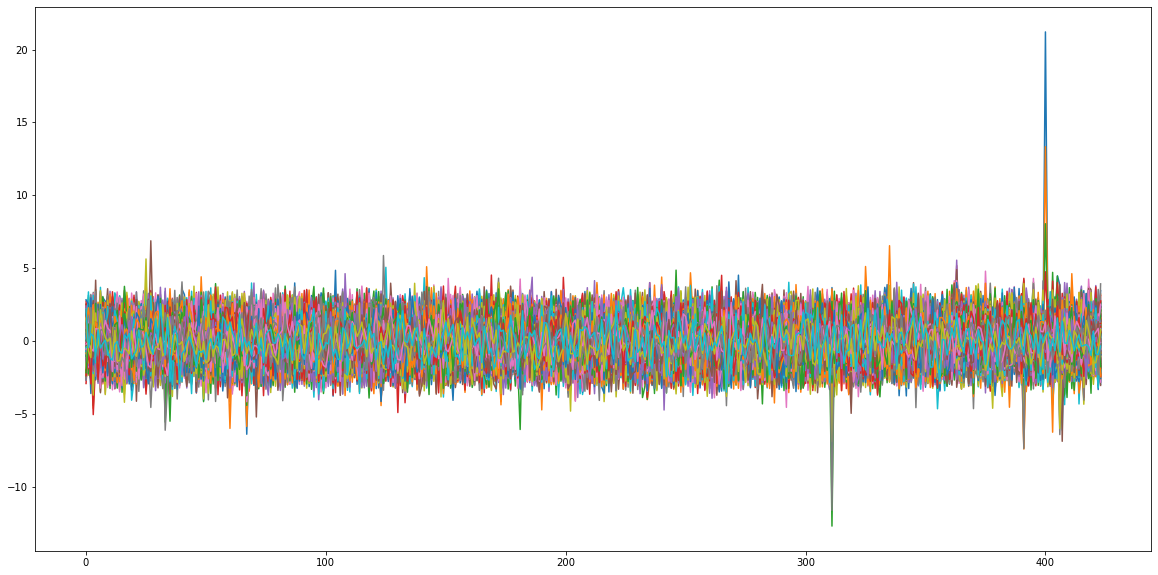

In [54]:
plt.figure(figsize=(20,10))
for i in arrays.T.iloc[:,:]:
        plt.plot(arrays.T[i])    

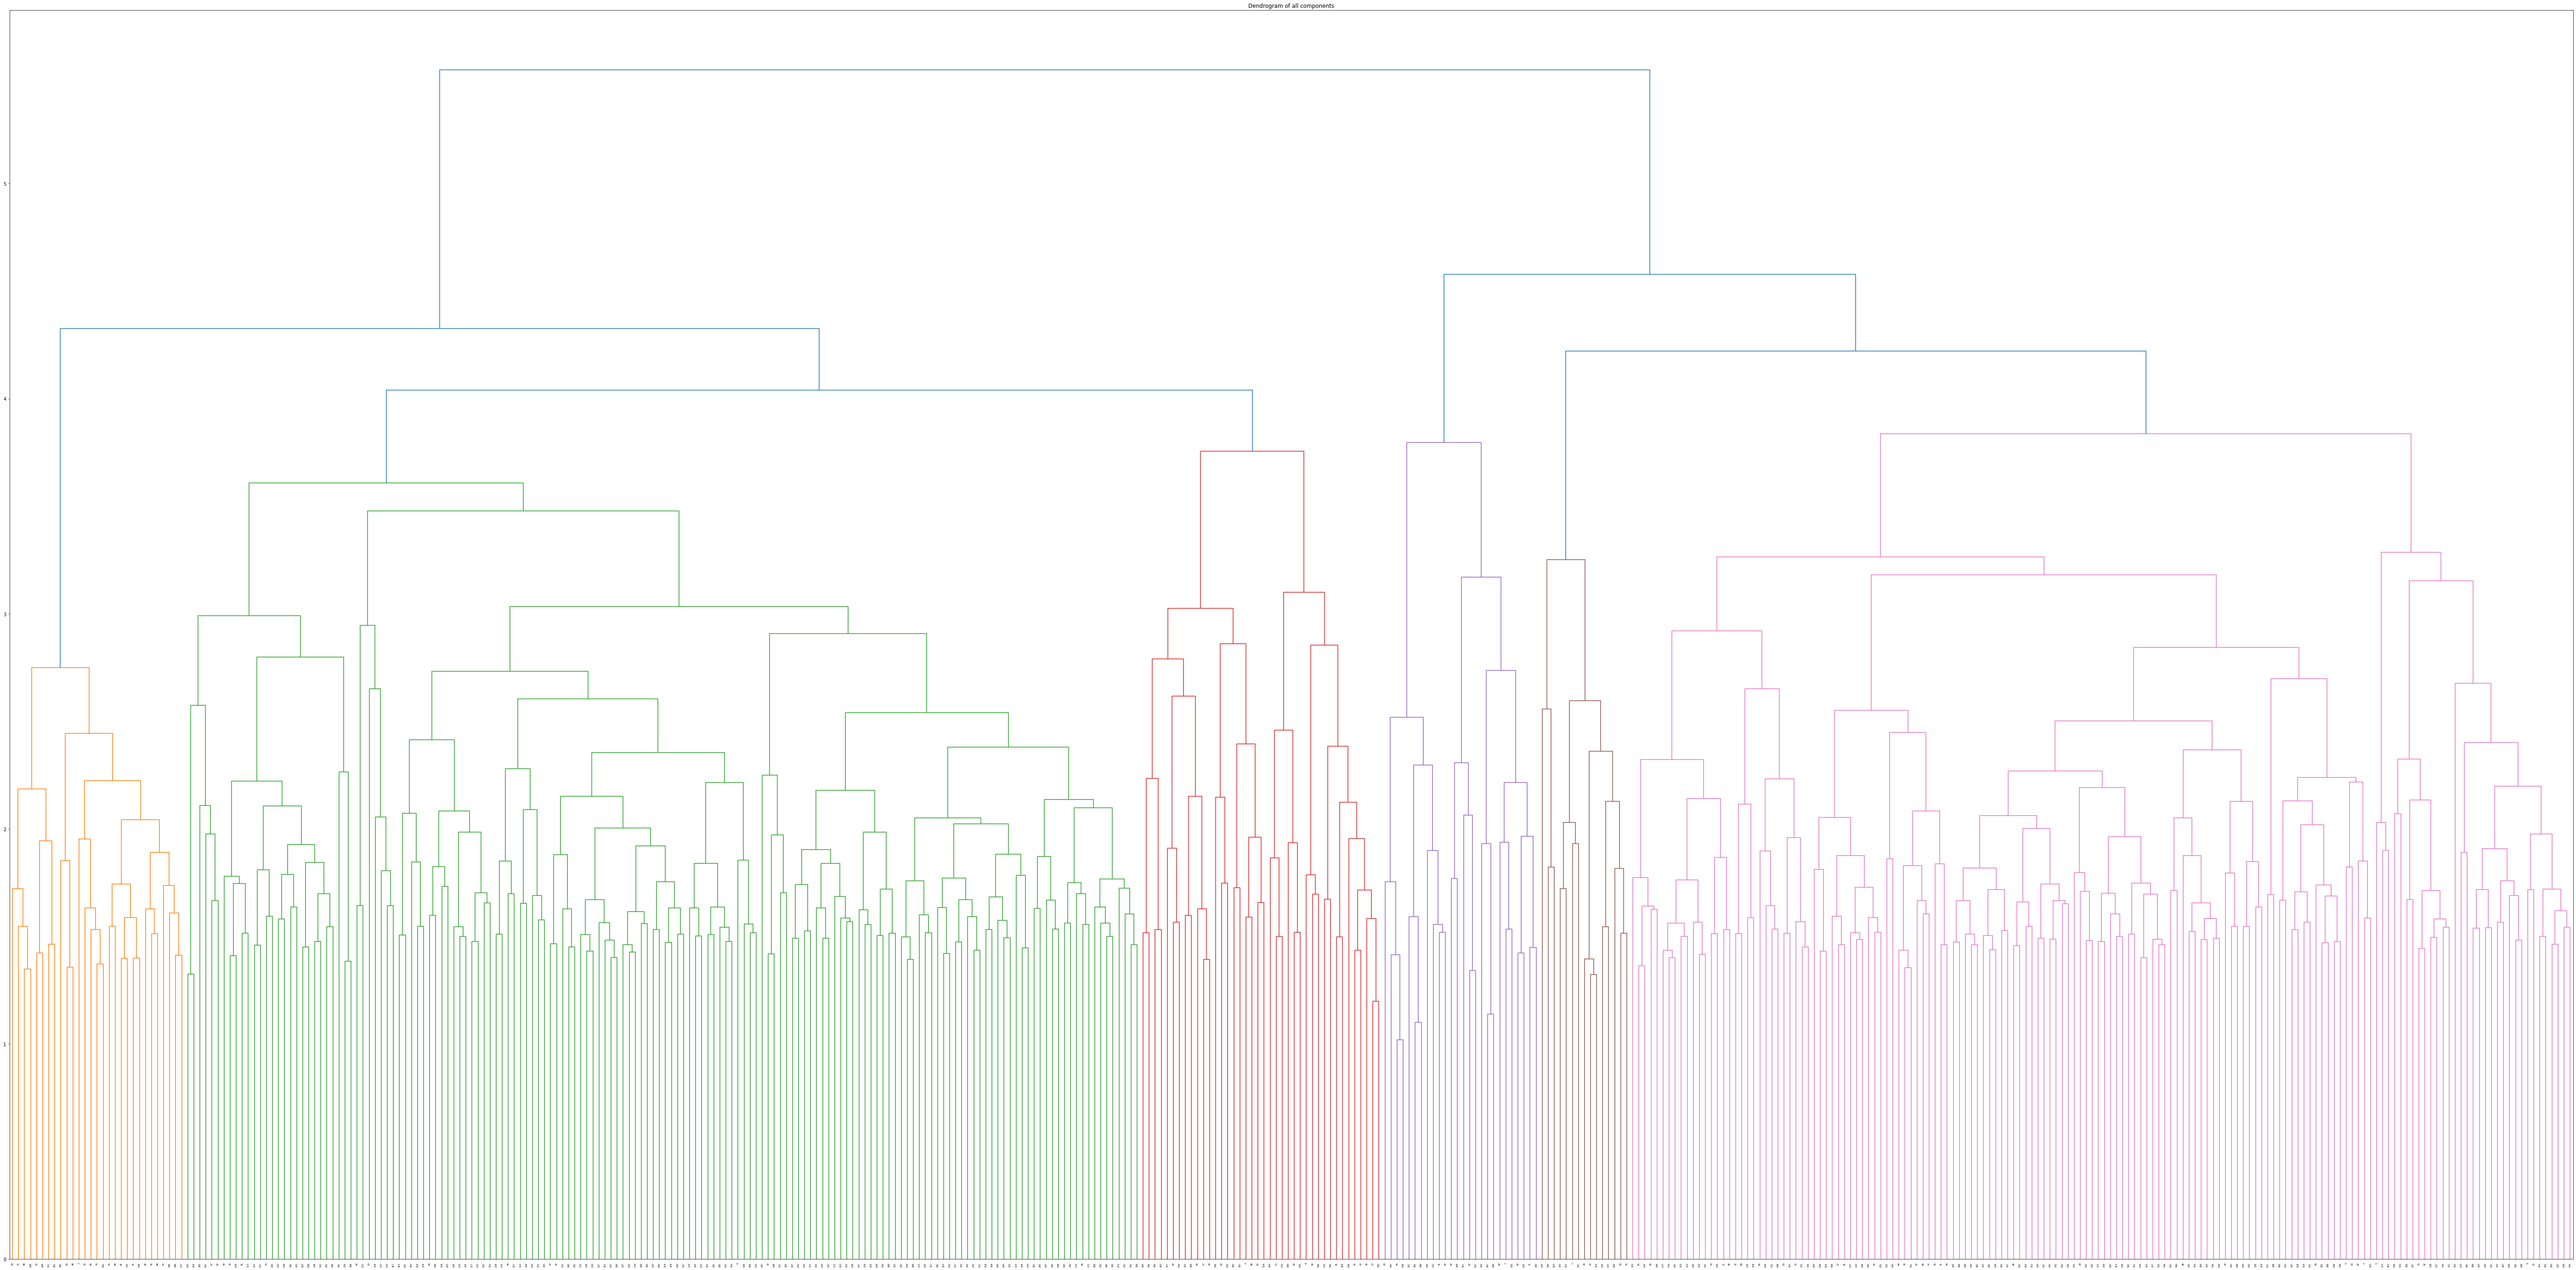

In [103]:
from scipy.spatial.distance import pdist
plt.figure(figsize=(100, 50))
plt.title("Dendrogram of all components")
corrmat = arrays.corr()
distanceMatrix = pdist(corrmat)
x = shc.linkage(distanceMatrix, method='ward', metric='euclidean')
dend = shc.dendrogram(shc.linkage(distanceMatrix, method='complete', metric='euclidean'))
plt.axhline(y=120, color='r', linestyle='--')

In [125]:
## This can be used to check for similarity  between the respective components using the brain maps.
cluster = dend['color_list']
component = dend['leaves']
x = 45 # This will give the component number at position 45, and the line below gives its corresponding cluster 
cluster[component[x]]

'C6'

In [93]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
a = cluster.fit_predict(corrmat)
print(a.shape)
print(a)

(424,)
[0 4 0 3 1 0 5 2 1 0 0 0 1 1 0 1 1 1 4 3 3 0 1 4 0 5 2 0 0 2 0 2 5 3 5 3 5
 0 1 1 3 5 5 0 0 2 0 0 3 5 0 3 1 0 3 0 1 5 5 0 0 1 2 1 0 1 0 2 3 3 3 2 3 0
 3 4 0 0 4 5 0 0 2 1 5 0 3 5 0 2 0 3 0 5 5 3 0 0 1 3 5 0 0 5 5 2 5 5 3 5 5
 0 0 5 5 5 0 5 1 0 0 5 2 5 0 5 0 5 5 5 0 0 5 5 1 3 0 5 0 5 0 0 5 0 0 2 0 0
 5 5 0 0 0 0 0 5 1 5 0 5 0 0 3 5 0 0 5 2 5 0 5 5 5 0 5 5 0 0 0 5 5 5 0 0 5
 5 5 0 5 2 2 0 0 5 0 5 3 5 0 0 1 0 5 5 0 5 0 5 0 5 0 2 5 5 5 5 0 5 5 5 5 0
 1 0 5 5 5 3 5 0 5 0 5 5 4 5 0 0 3 0 0 5 5 0 5 1 0 5 0 0 0 5 5 0 5 5 2 5 5
 5 0 5 0 0 5 5 0 2 5 5 5 5 5 5 5 0 5 5 0 5 5 0 0 5 5 5 5 0 0 2 5 5 5 0 0 5
 5 0 0 0 4 0 5 0 5 5 0 0 5 0 0 3 0 0 0 5 0 5 5 5 0 5 0 0 5 5 0 0 5 0 5 5 5
 0 2 0 0 0 5 0 5 0 0 5 0 4 0 5 5 0 0 0 5 5 5 0 0 5 5 5 5 5 5 2 1 1 1 4 1 1
 0 5 1 4 4 0 5 1 5 1 0 0 2 1 1 3 3 1 5 2 1 3 1 5 4 2 0 5 0 1 5 5 1 4 1 0 0
 0 3 4 5 2 0 4 0 5 0 5 1 5 0 5 0 5]


<AxesSubplot:>

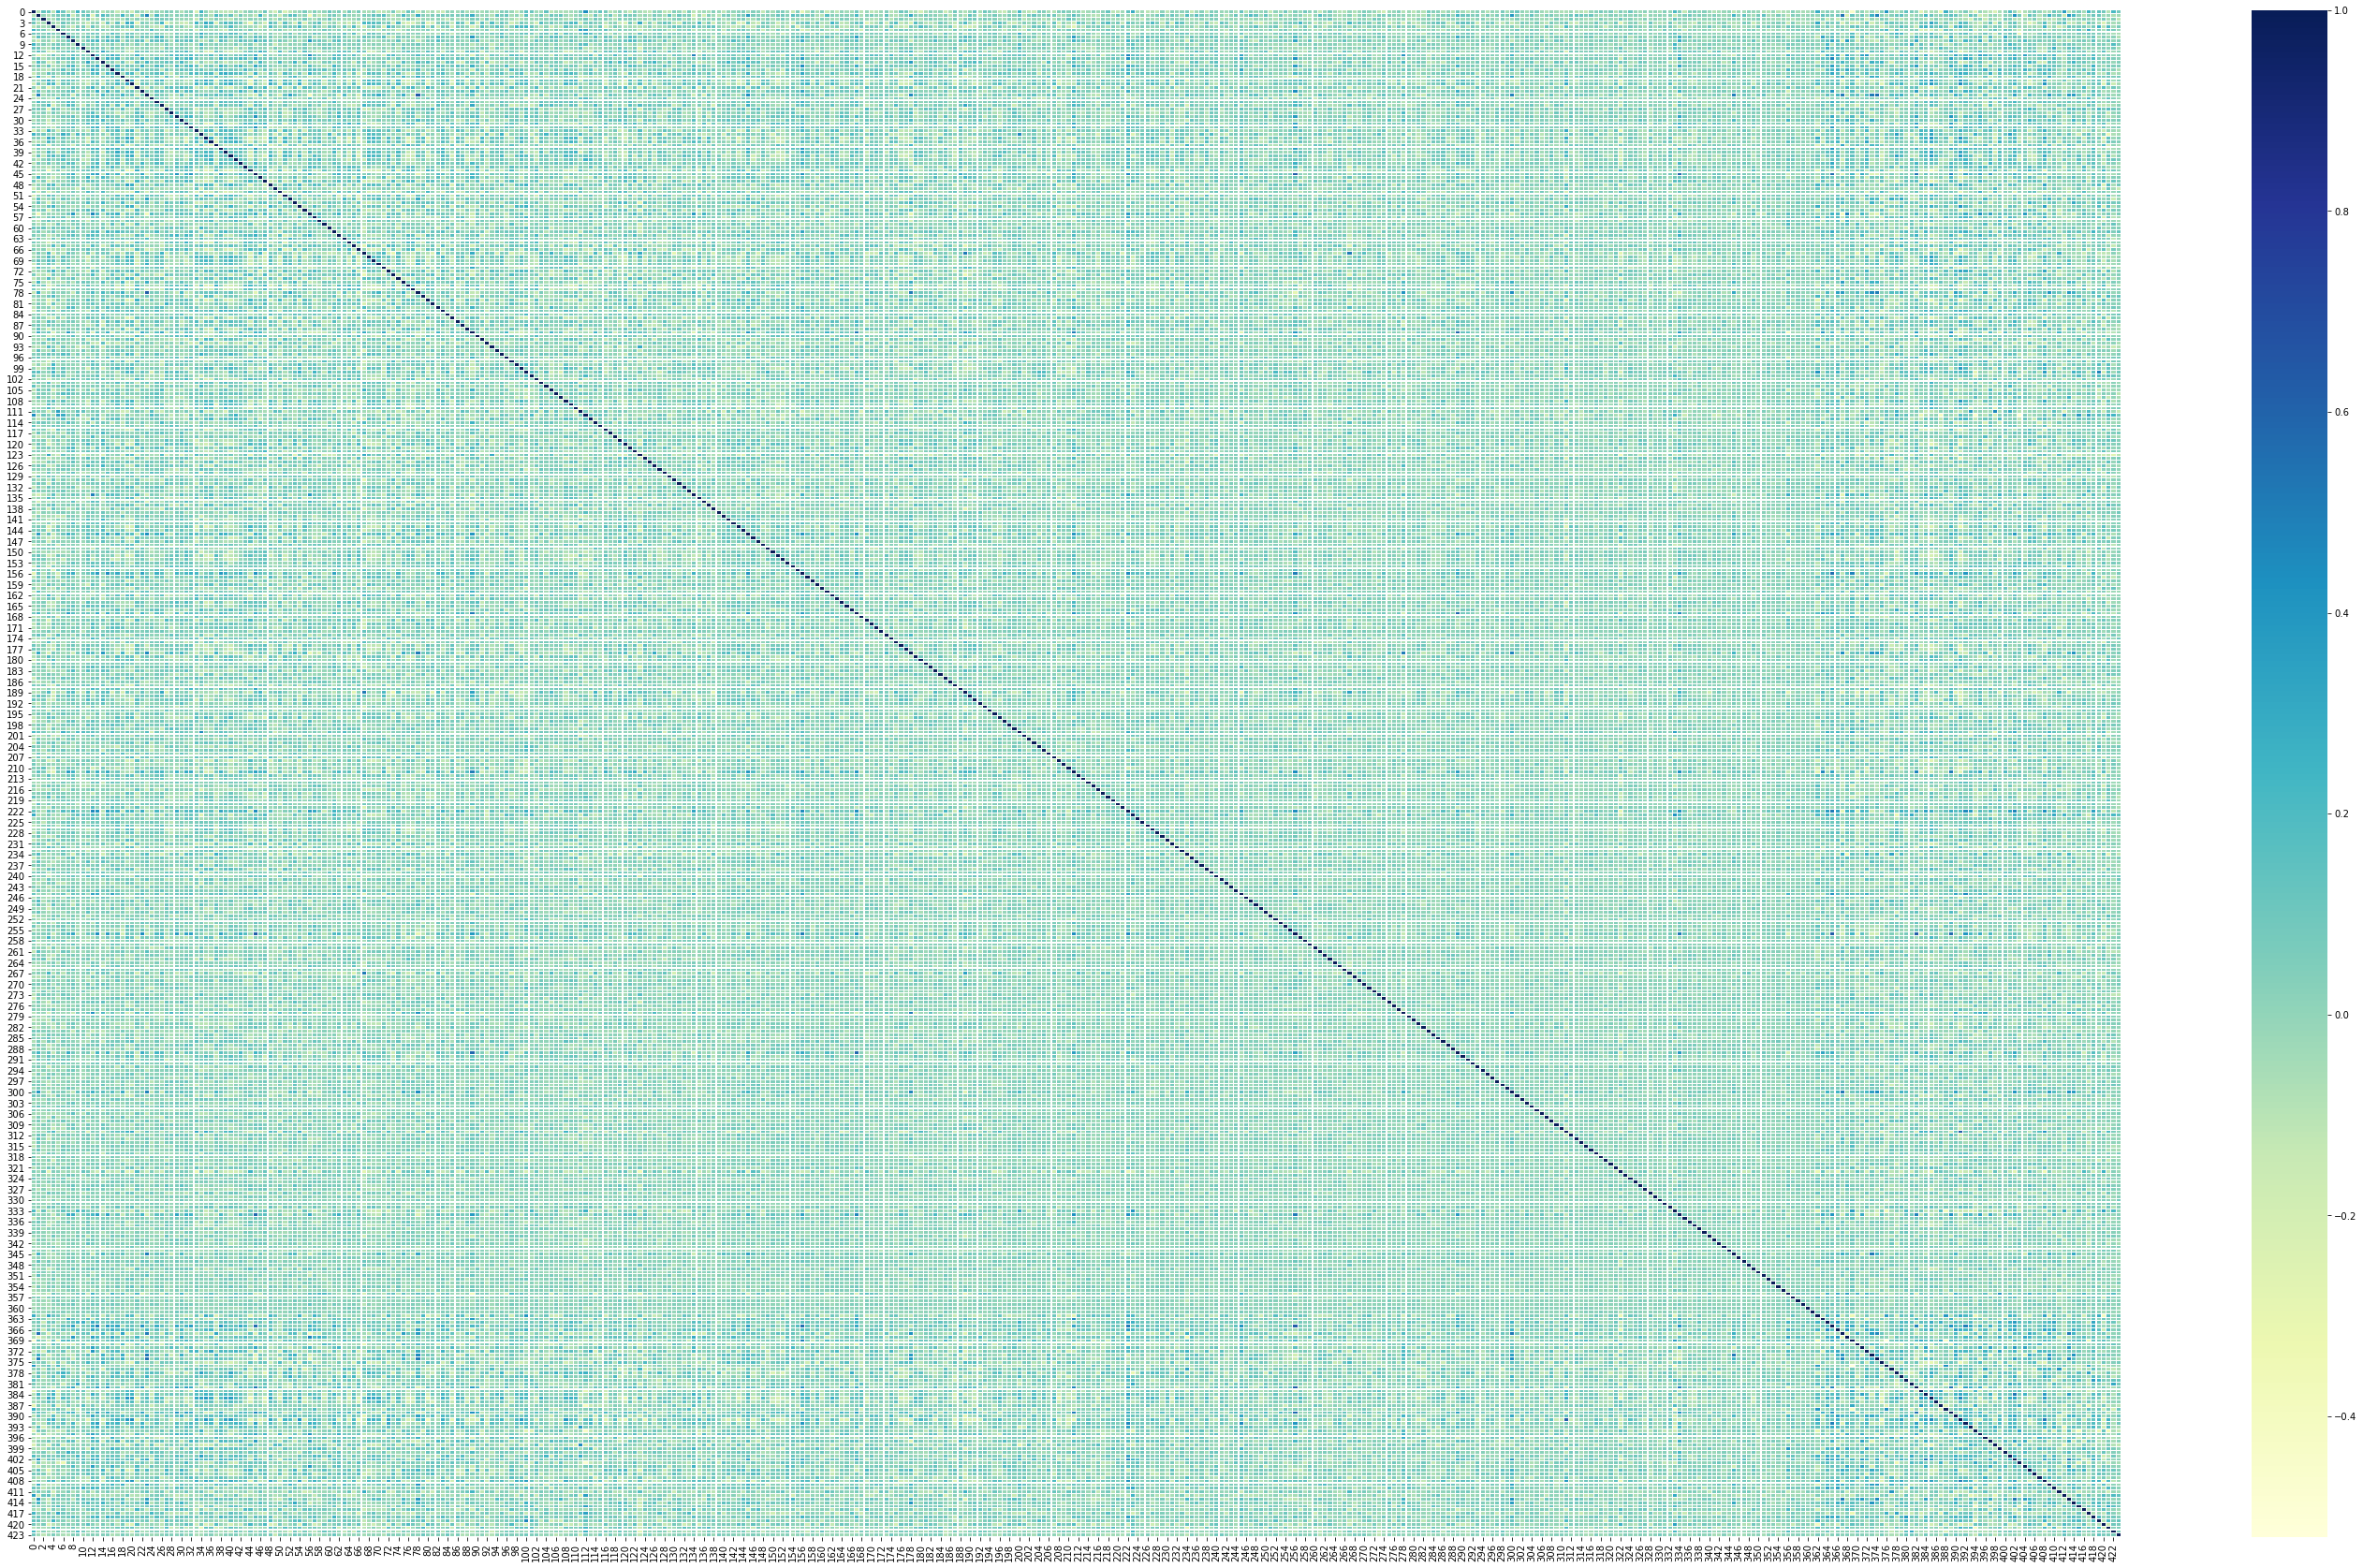

In [94]:
# rough connectivity graph
corrmat = arrays.corr()
f, ax = plt.subplots(figsize =(50, 30))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)



In [62]:
## How to extract a sub cluster within dendrogram?
## work for later
def plot_tree(P, pos=None):
    plt.clf()
    icoord = scipy.array(P['icoord'])
    dcoord = scipy.array(P['dcoord'])
    color_list = scipy.array(P['color_list'])
    xmin, xmax = icoord.min(), icoord.max()
    ymin, ymax = dcoord.min(), dcoord.max()
    if pos:
        icoord = icoord[pos]
        dcoord = dcoord[pos]
        color_list = color_list[pos]
    for xs, ys, color in zip(icoord, dcoord, color_list):
        plt.plot(xs, ys, color)
    plt.xlim(xmin-10, xmax + 0.1*abs(xmax))
    plt.ylim(ymin, ymax + 0.1*abs(ymax))
    plt.show()

<ipython-input-62-02fd240d2353>:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  icoord = scipy.array(P['icoord'])
<ipython-input-62-02fd240d2353>:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  dcoord = scipy.array(P['dcoord'])
<ipython-input-62-02fd240d2353>:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  color_list = scipy.array(P['color_list'])


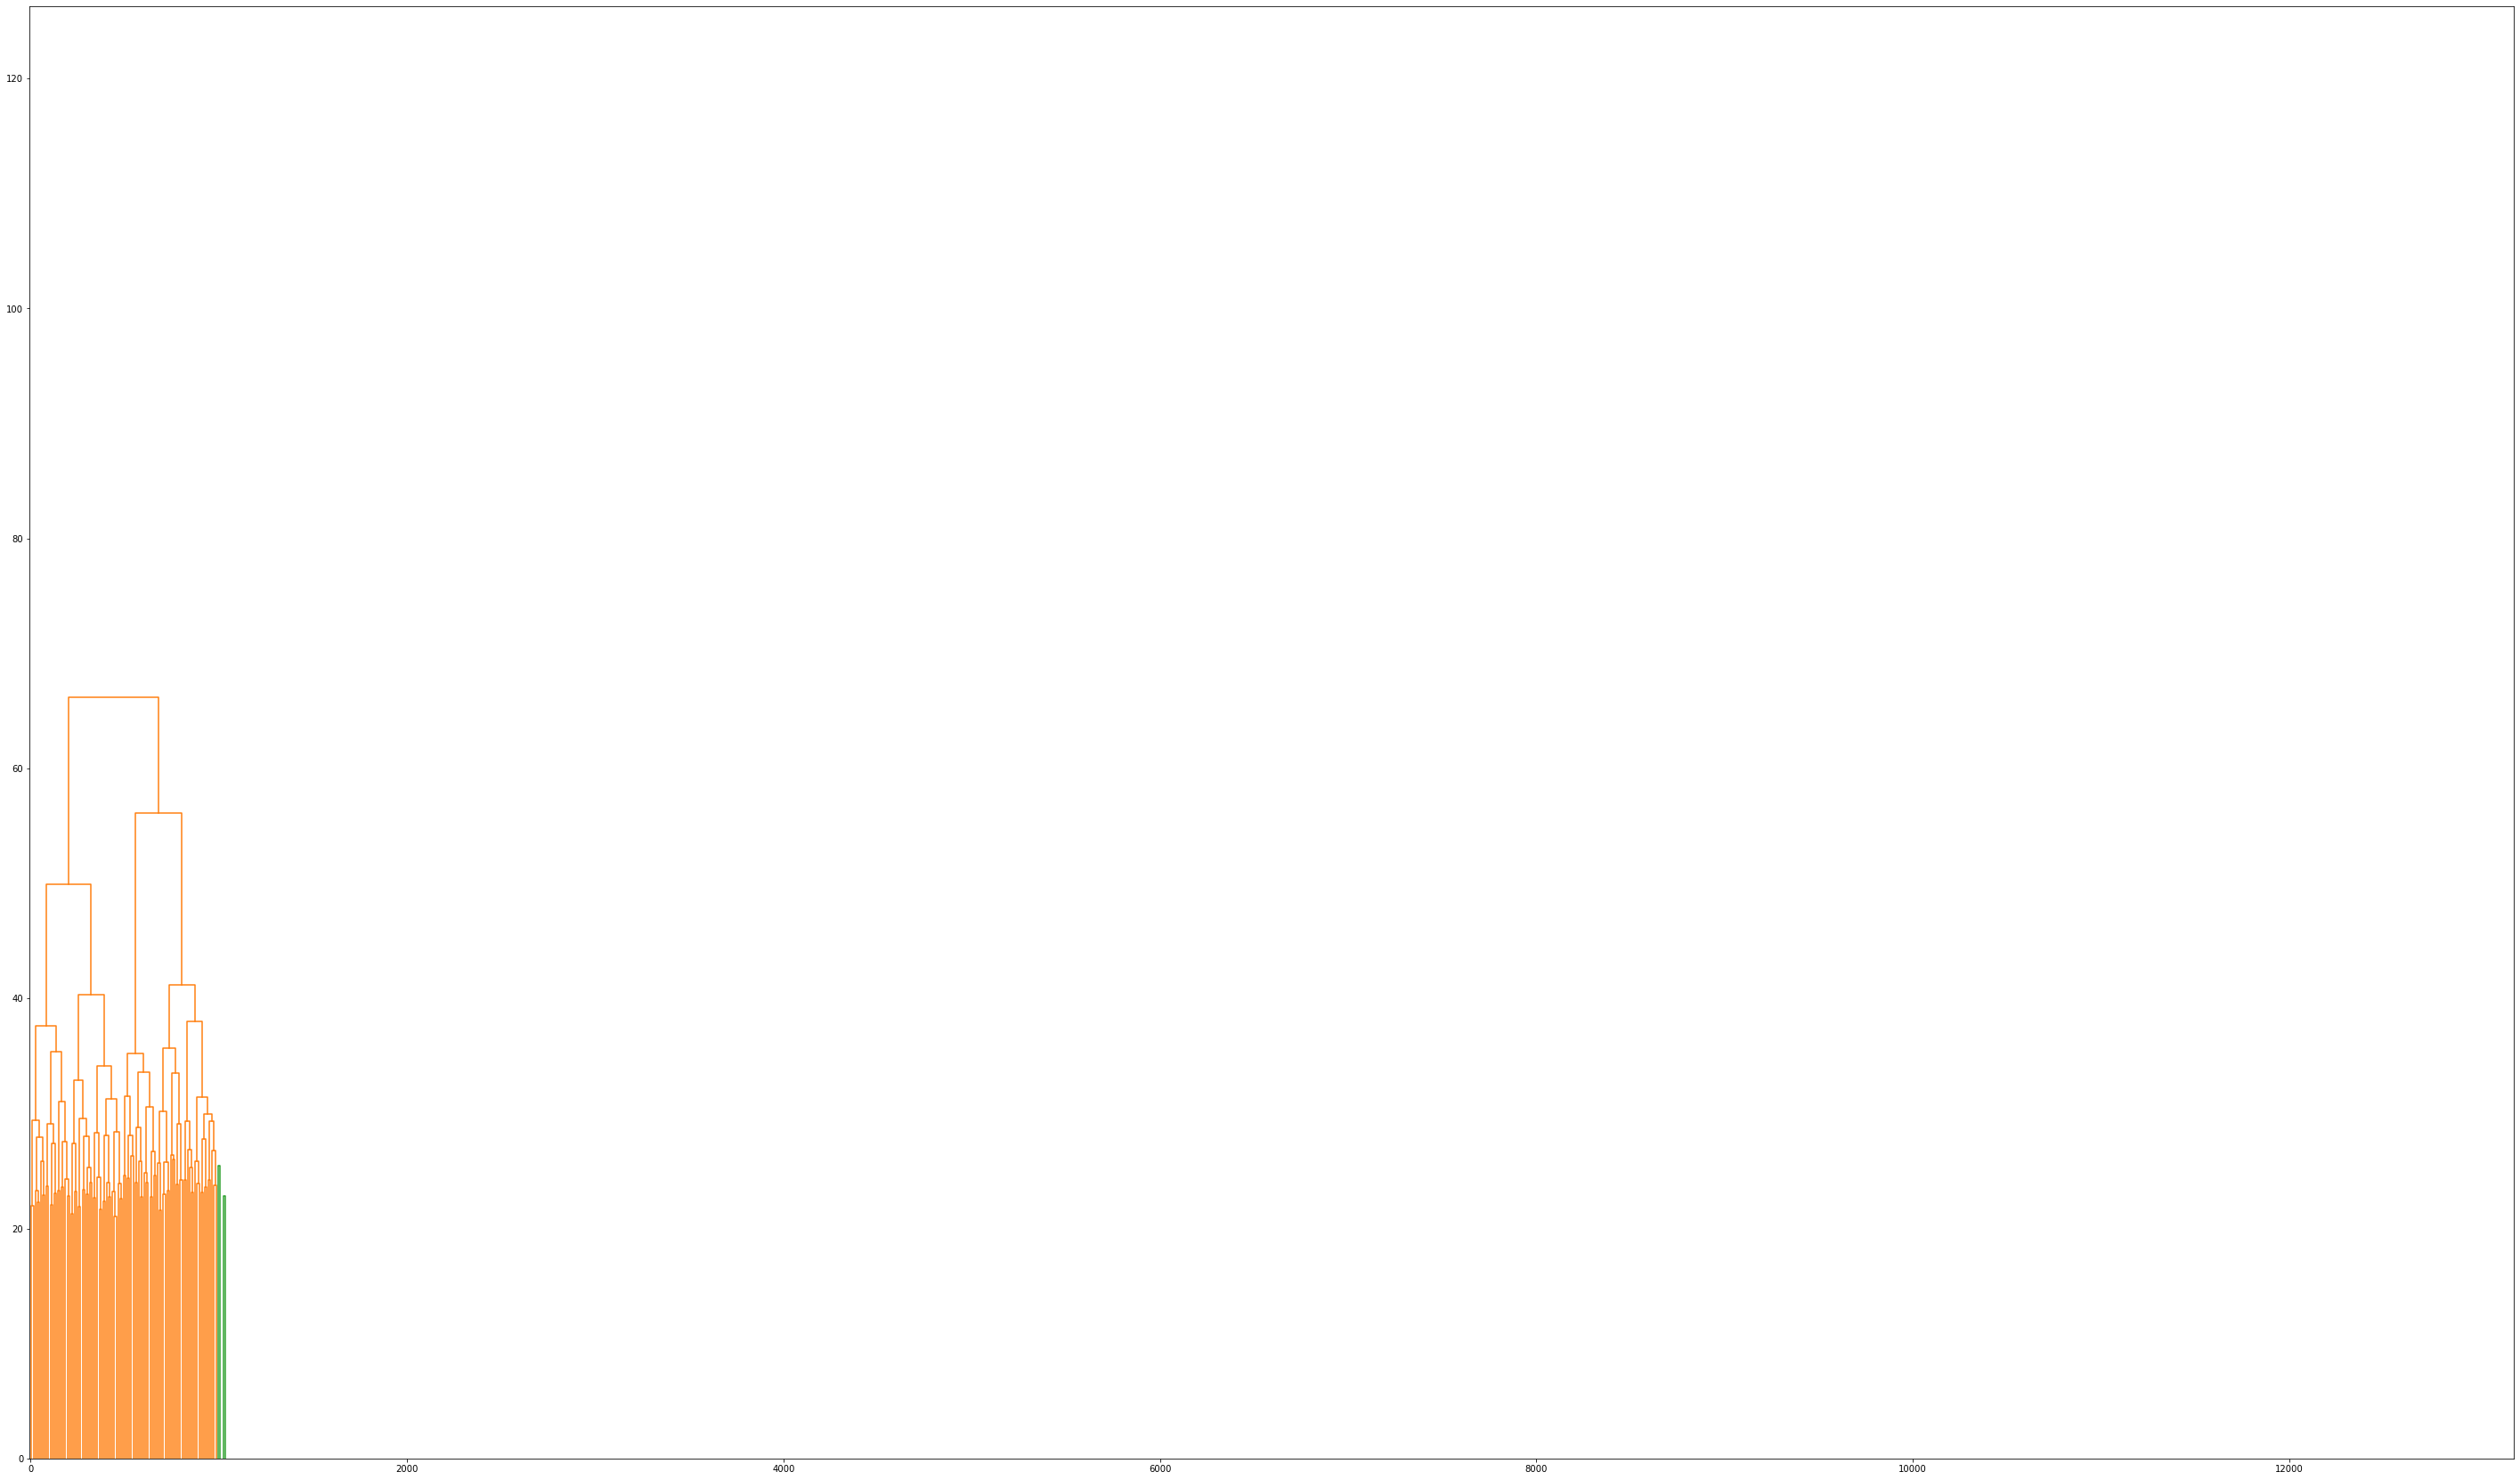

In [63]:
plt.figure(figsize=(50,30))
plot_tree(dend, range(100))

In [75]:
c_mat = arrays.corr()
c_mat.shape
#sns.heatmap(c_mat, annot = True)
#plt.show()

(424, 424)

<AxesSubplot:>

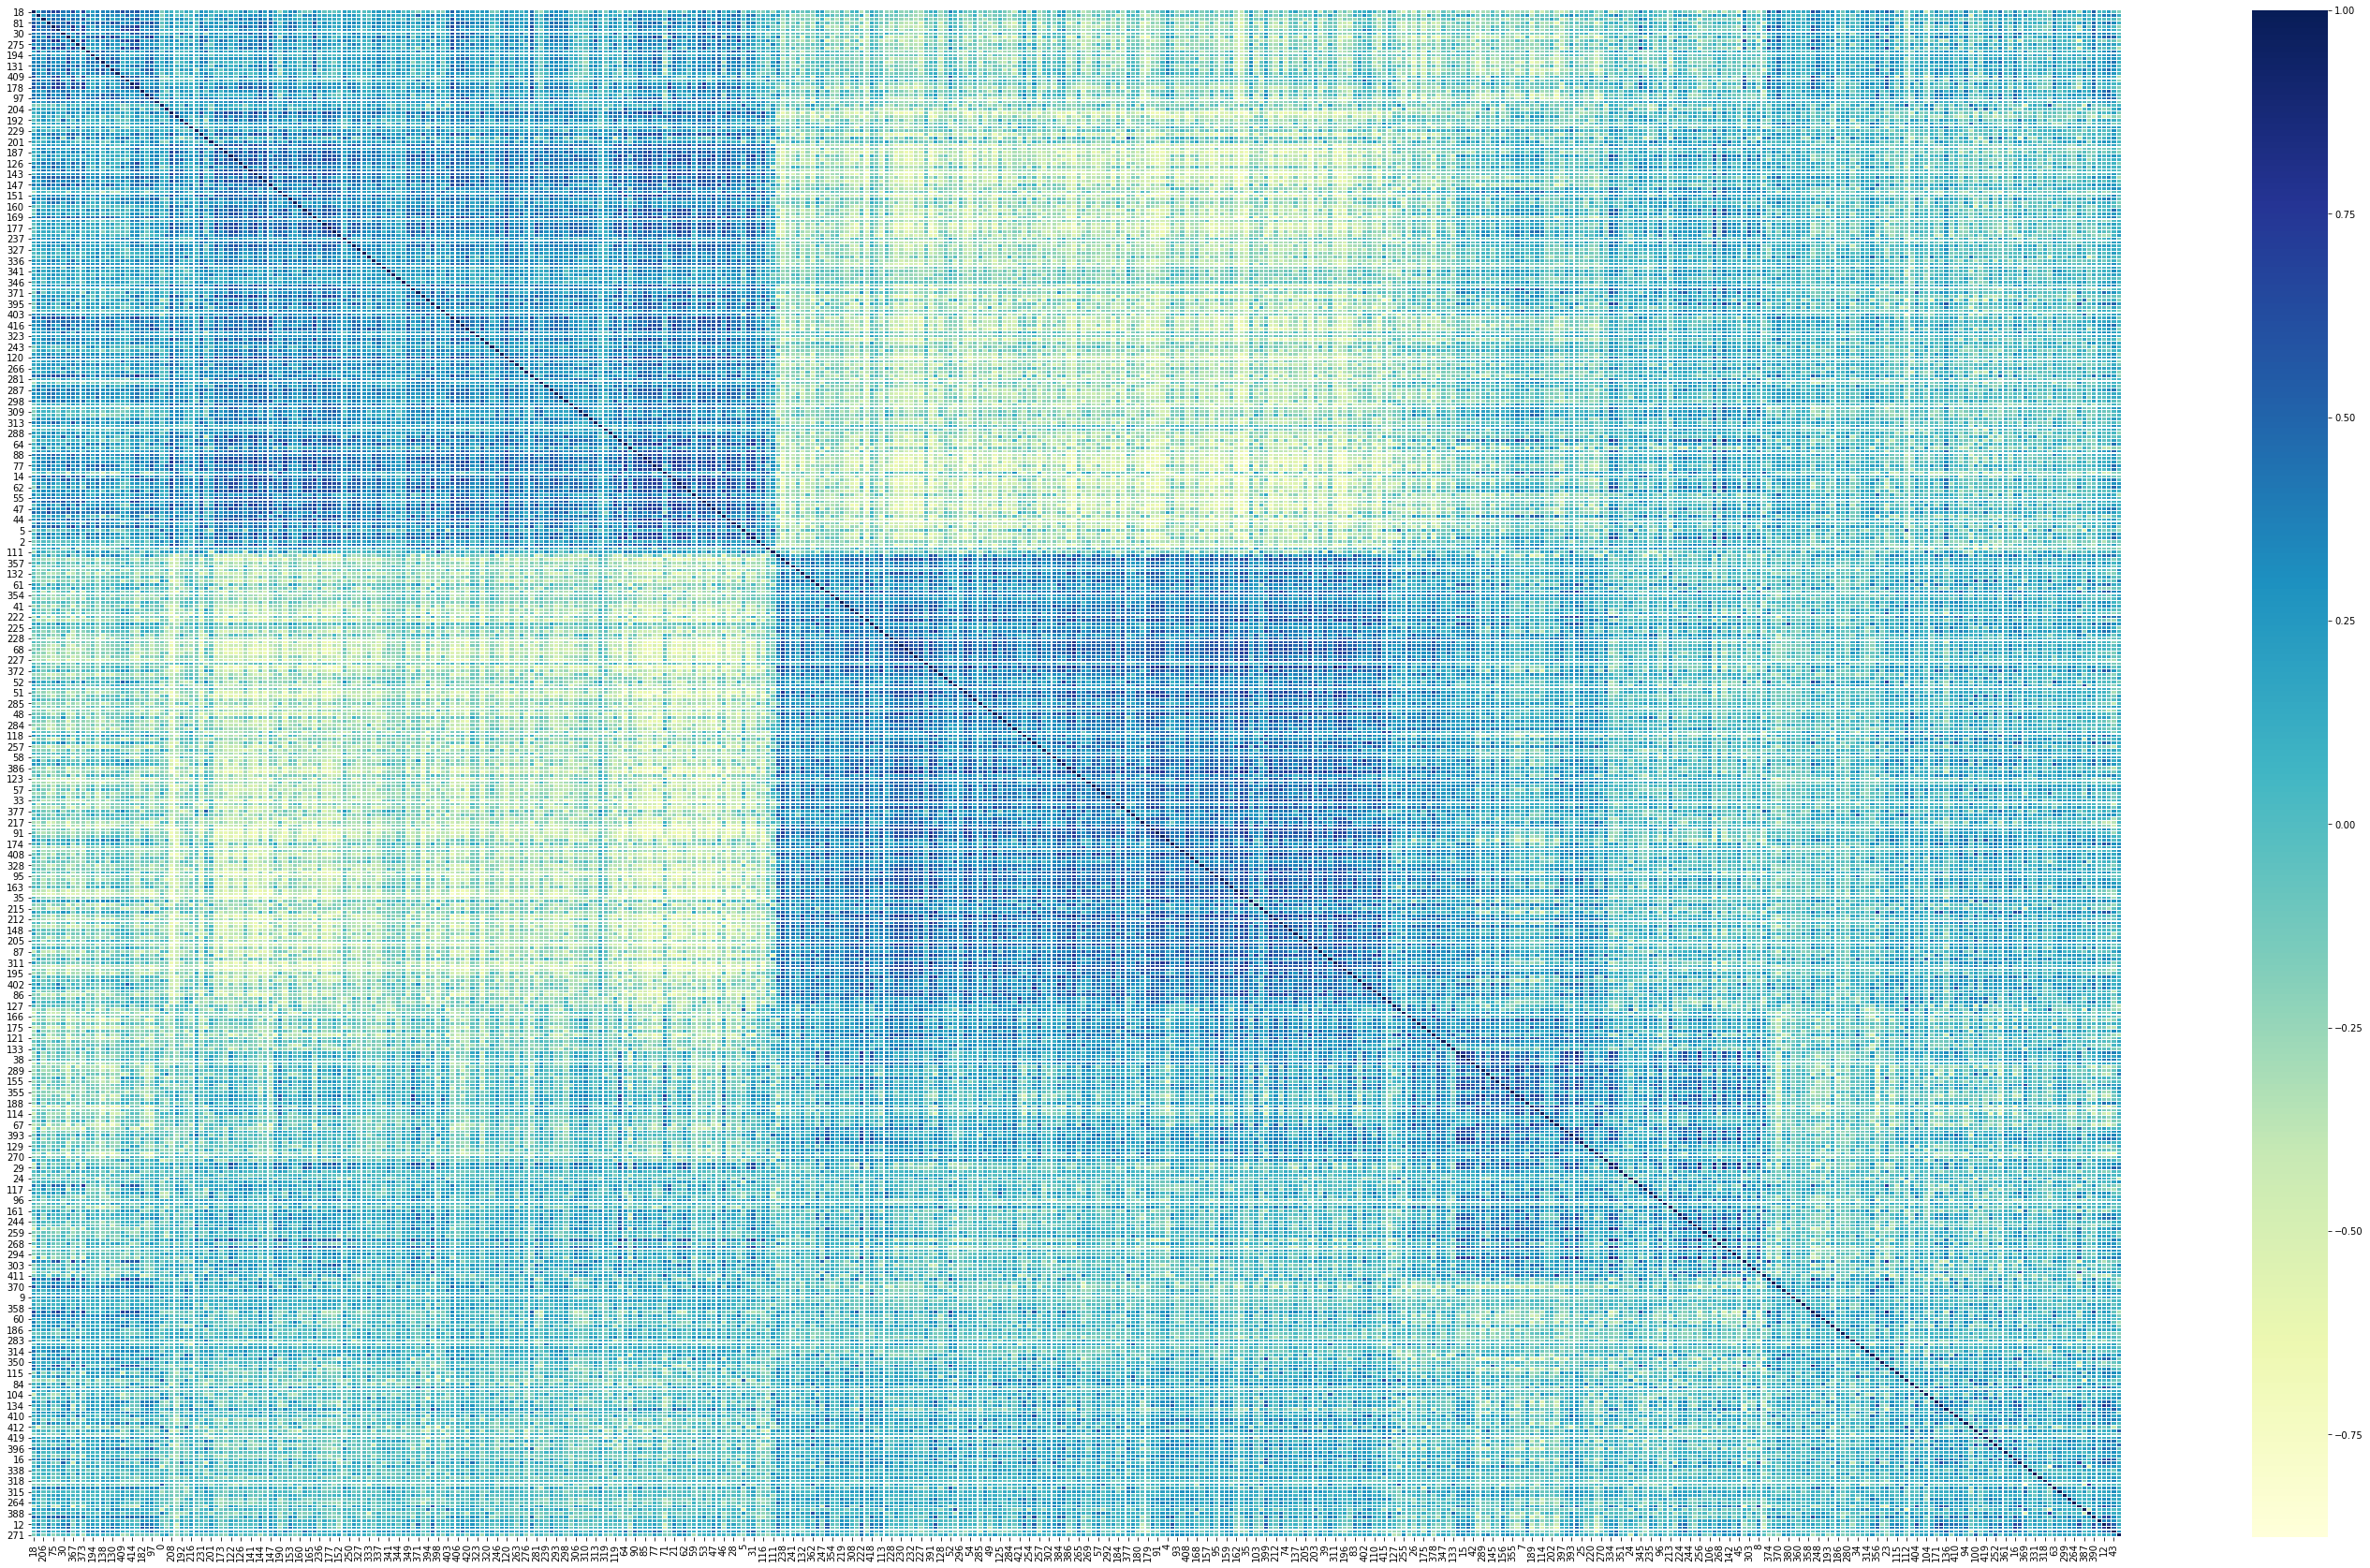

In [102]:
## Clustering of correlation map
import scipy
import scipy.cluster.hierarchy as sch

X = corrmat.corr().values
d = shc.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = shc.linkage(d, method='complete')
ind = shc.fcluster(L, 0.5*d.max(), 'distance')
columns = [corrmat.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = corrmat.reindex(columns, axis=1)
f, ax = plt.subplots(figsize =(50, 30))
sns.heatmap(df.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)